# **Concrete Strength Prediction**

In [2]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
df = pd.read_csv("Concrete-strength_data.csv")
df.head(10)

,Cement,Blast_furn_slag,Fly_Ash,Water,Superplasticizer,Coarse_Agg,fine_Agg,Age (day),concrete_strength
0,540.0,1.0,1.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,1.0,1.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,1.0,228.0,1.0,932.0,594.0,270,40.27
3,332.5,142.5,1.0,228.0,1.0,932.0,594.0,365,41.05
4,198.6,132.4,1.0,192.0,1.0,978.4,825.5,360,44.30
5,266.0,114.0,1.0,228.0,1.0,932.0,670.0,90,47.03
6,380.0,95.0,1.0,228.0,1.0,932.0,594.0,365,43.70
7,380.0,95.0,1.0,228.0,1.0,932.0,594.0,28,36.45
8,266.0,114.0,1.0,228.0,1.0,932.0,670.0,28,45.85
9,475.0,1.0,1.0,228.0,1.0,932.0,594.0,28,39.29


## **Exploratory Data Analysis (EDA)**

In [4]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Cement               0.0
Blast_furn_slag      0.0
Fly_Ash              0.0
Water                0.0
Superplasticizer     0.0
Coarse_Agg           0.0
fine_Agg             0.0
Age (day)            0.0
concrete_strength    0.0
dtype: float64


<Axes: >

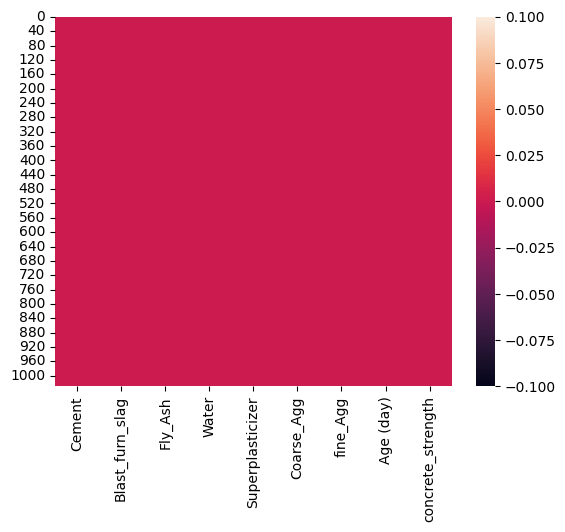

In [5]:
import matplotlib.pyplot as plt # visualisation lib.
import seaborn as sns # visualisation lib.

# Finding if the dataset has any missing values
print(df.isna().mean()*100)
sns.heatmap(df.isna(), color='Purple') # heatmap to show missing values

In [6]:
df.describe()

,Cement,Blast_furn_slag,Fly_Ash,Water,Superplasticizer,Coarse_Agg,fine_Agg,Age (day),concrete_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,74.353107,54.737864,181.567282,6.572621,972.918932,773.580485,45.662136,35.817961
std,104.506364,85.887864,63.531503,21.354219,5.599017,77.753954,80.175980,63.169912,16.705742
min,102.000000,1.000000,1.000000,121.800000,1.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,1.000000,1.000000,164.900000,1.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,1.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<Axes: >

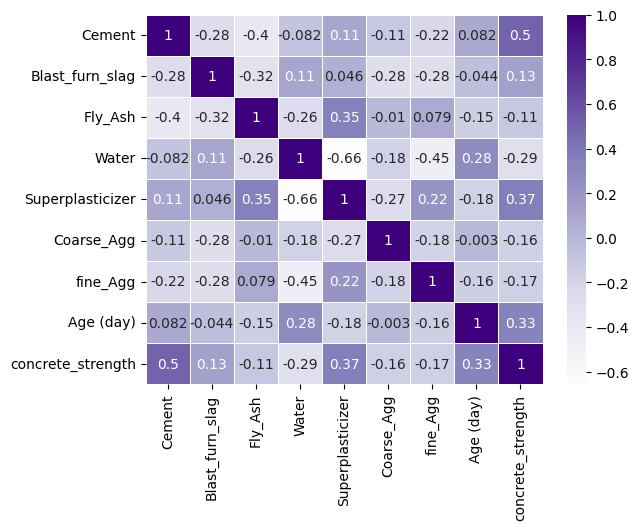

In [7]:
# correlation matrix: find correlations between numerical features
sns.heatmap(df.corr(), cmap='Purples', annot = True,linewidth=0.5)

In [8]:
# ignore warnings and show max rows and cols
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None, 'display.max_columns', None)

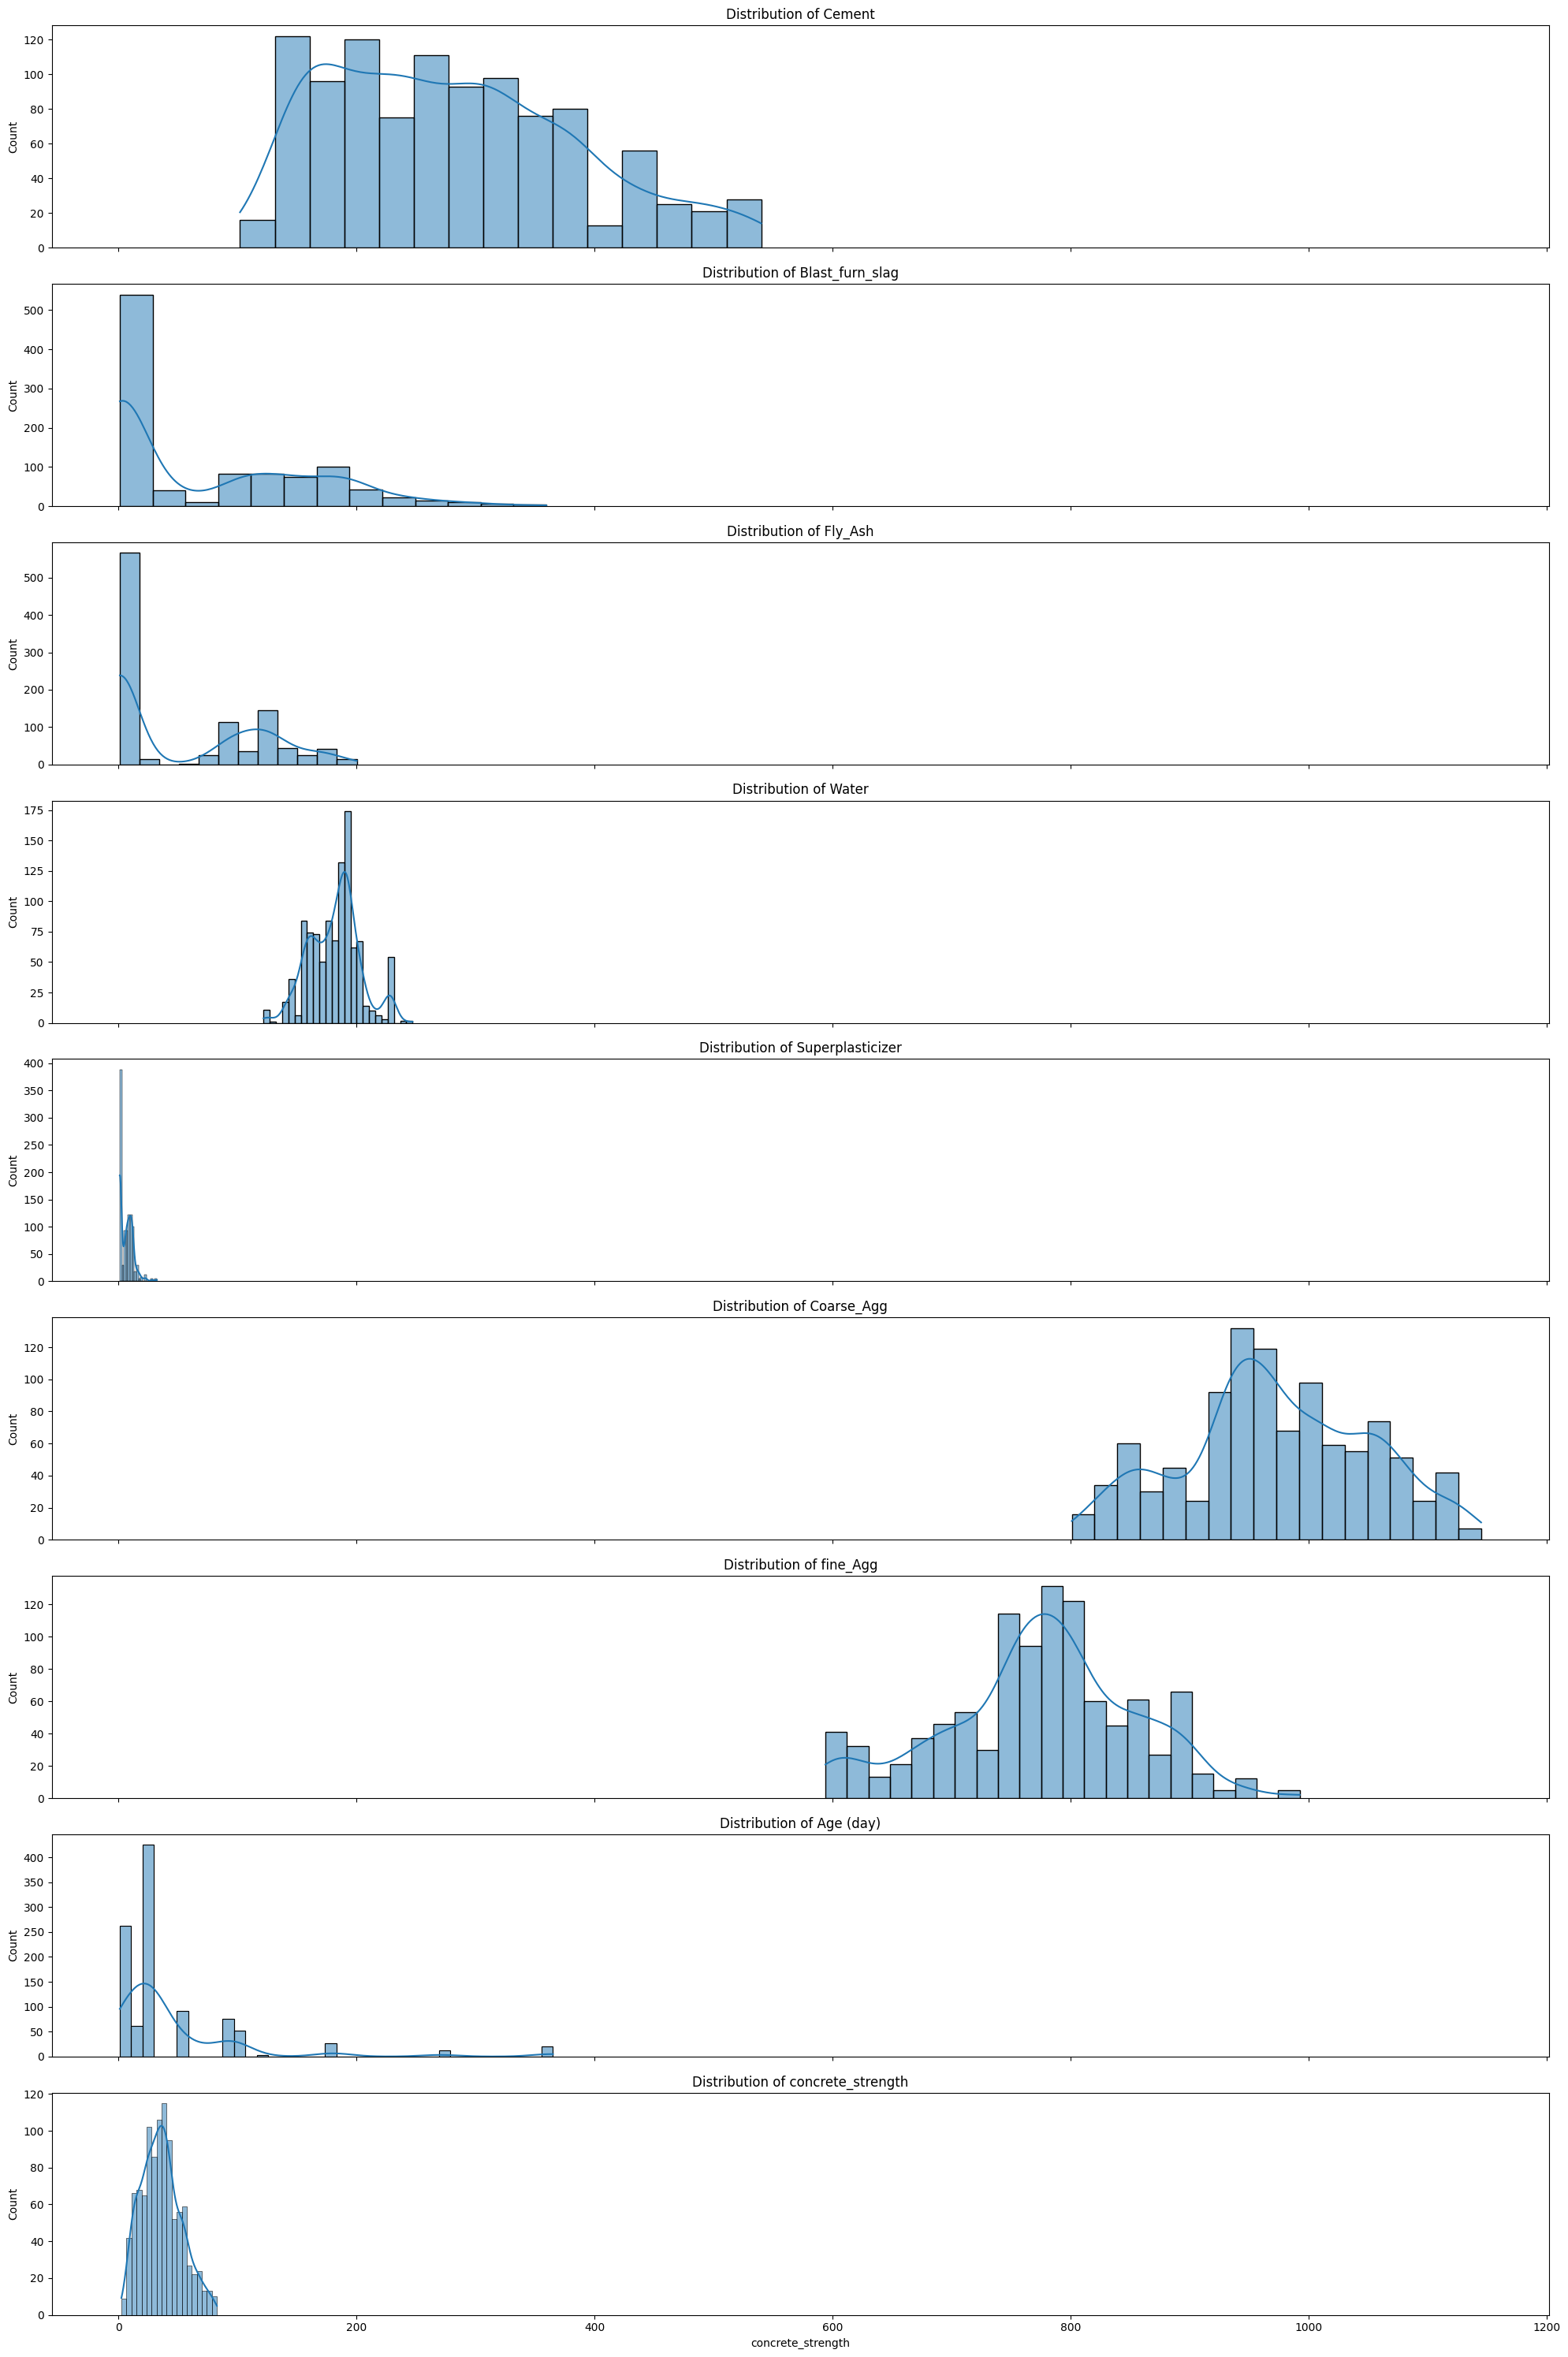

In [9]:
selected_columns = ['Cement', 'Blast_furn_slag', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Agg', 'fine_Agg', 'Age (day)', 'concrete_strength']

fig, axes = plt.subplots(nrows=len(selected_columns), ncols=1, figsize=(20, 30), sharex=True)

for i, column in enumerate(selected_columns):
    sns.histplot(data=df, x=column, multiple='stack', ax=axes[i], kde=True, palette='Set1')
    axes[i].set_title(f"Distribution of {column}")
    
plt.tight_layout()
plt.show()

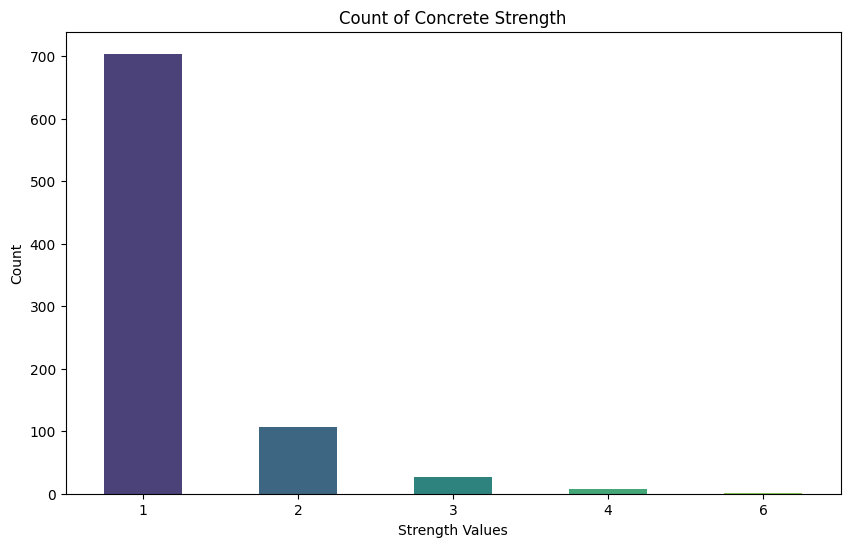

In [10]:
concrete_strength = df['concrete_strength'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x=concrete_strength, palette='viridis', width=0.5)
plt.title('Count of Concrete Strength')
plt.xlabel('Strength Values')
plt.ylabel('Count')
plt.show()

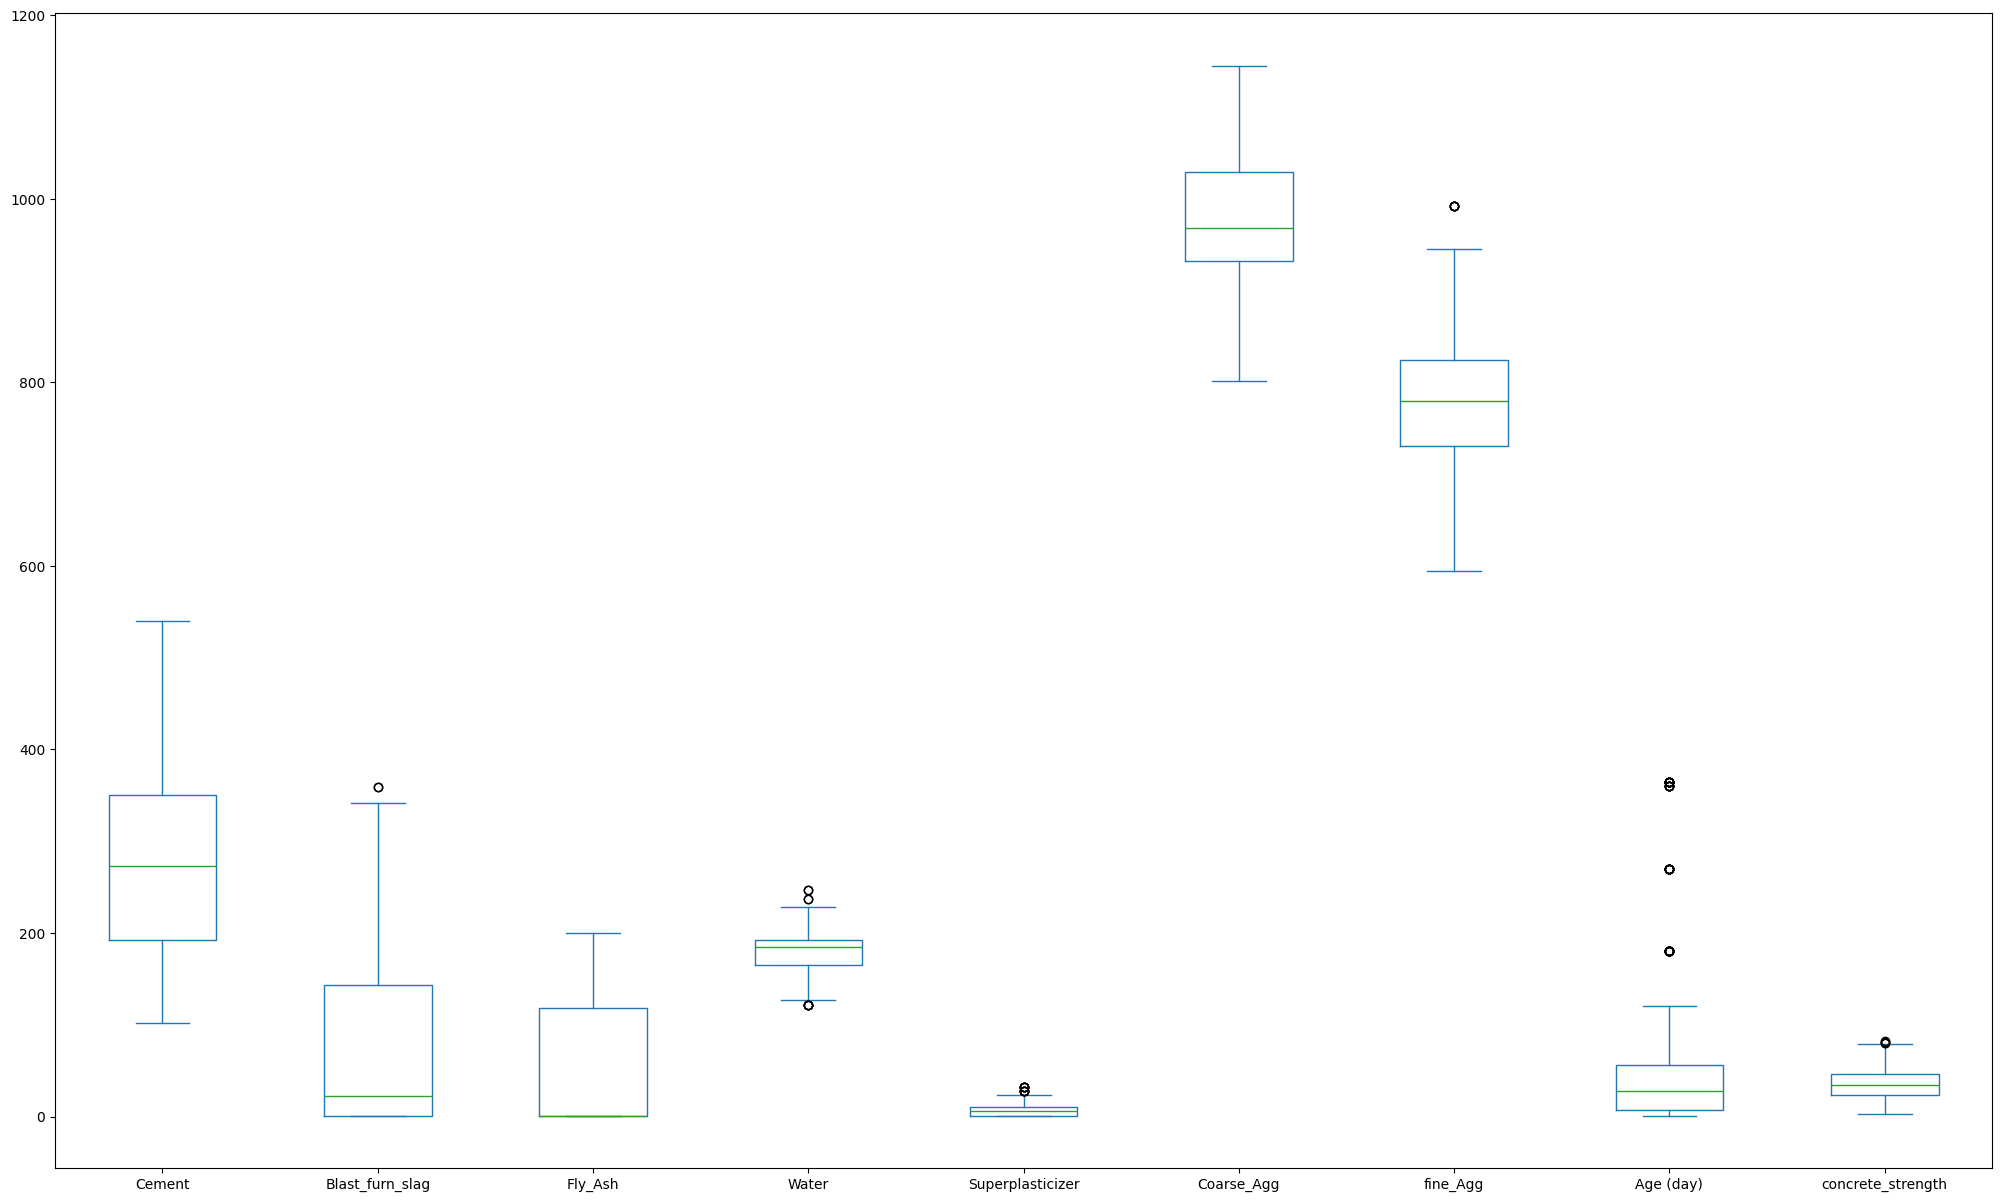

In [11]:
## analysing outliers
n1=['Cement', 'Blast_furn_slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Agg', 'fine_Agg', 'Age (day)','concrete_strength']
df[n1].plot.box(figsize=(25,15))
plt.xticks(rotation='horizontal')
plt.show()

<Axes: >

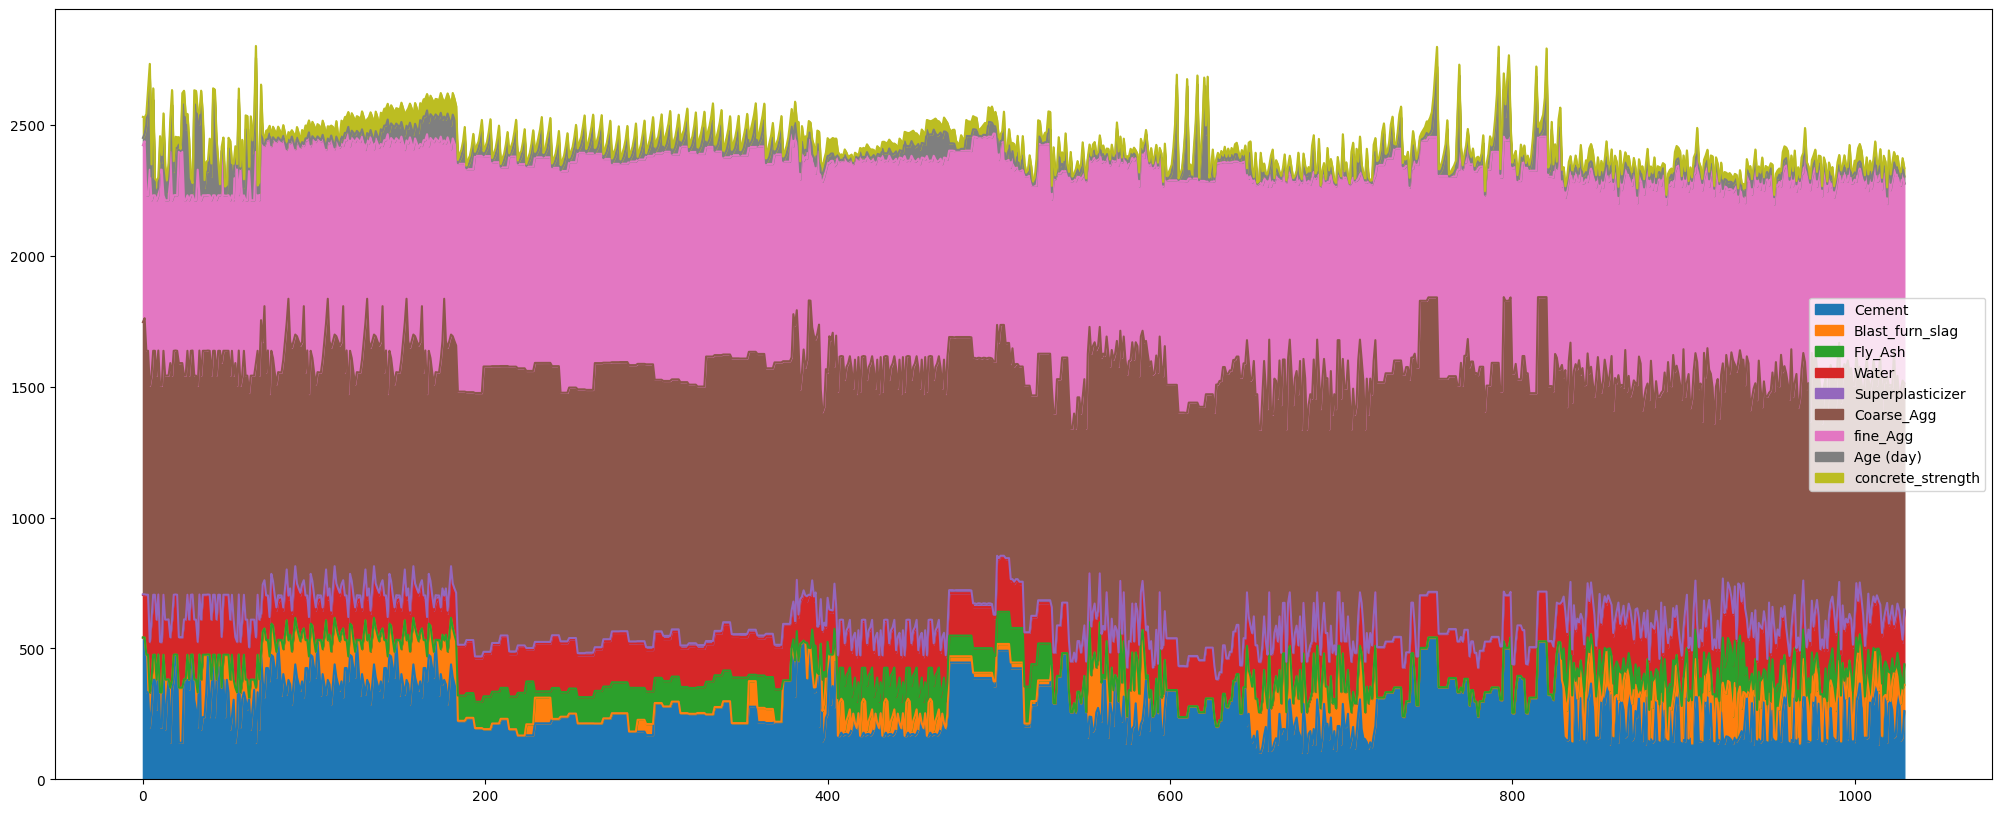

In [12]:
# ratio between each raw material's measurement
selected_columns = ['Cement', 'Blast_furn_slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Agg', 'fine_Agg', 'Age (day)','concrete_strength']

df[selected_columns].plot.area( figsize=(25,10)) # area plot

## **Data cleaning and Preprocessing**
- Dropping duplicate values
- Impote missig values if they are missing at random
- remove outliers
- encode categorical features
- split dataset into train and test set
- feature scaling 
- deal wiht imbalanced data

In [13]:
# drop duplicate values
df.drop_duplicates(inplace=True)

In [14]:
# shapes after dropping duplicates
df.shape 

(1005, 9)

In [15]:
!pip install numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import numpy as np
df.replace(0.0, 1.0, inplace=True) # replace 0.0 with 1.0

# this is because if we condider 0 then it is equivalent to NaN, so its good to convert it into 1  

In [17]:
df.isnull().mean()*100 # find percentage of missing values

# according to the output, our dataset has no missing values

Cement               0.0
Blast_furn_slag      0.0
Fly_Ash              0.0
Water                0.0
Superplasticizer     0.0
Coarse_Agg           0.0
fine_Agg             0.0
Age (day)            0.0
concrete_strength    0.0
dtype: float64

In [18]:
n1 = df[['fine_Agg','Blast_furn_slag', 'Age (day)','Water', 'Superplasticizer','concrete_strength']]
per25 = n1.quantile(0.25)
per75 = n1.quantile(0.75)
iqr = per75 - per25
#  upper and lower limits
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

# Filter out rows with values outside the limits
outliers = n1[(n1 >= lower_limit) & (n1 <= upper_limit)]

print("Percentile 25:")
print(per25)
print("\nPercentile 75:")
print(per75)
print("\nIQR:")
print(iqr)
print("\nUpper Limit:")
print(upper_limit)
print("\nLower Limit:")
print(lower_limit)

Percentile 25:
fine_Agg             724.30
Blast_furn_slag        1.00
Age (day)              7.00
Water                166.60
Superplasticizer       1.00
concrete_strength     23.52
Name: 0.25, dtype: float64

Percentile 75:
fine_Agg             822.20
Blast_furn_slag      142.50
Age (day)             56.00
Water                192.90
Superplasticizer      10.00
concrete_strength     44.87
Name: 0.75, dtype: float64

IQR:
fine_Agg              97.90
Blast_furn_slag      141.50
Age (day)             49.00
Water                 26.30
Superplasticizer       9.00
concrete_strength     21.35
dtype: float64

Upper Limit:
fine_Agg             969.050
Blast_furn_slag      354.750
Age (day)            129.500
Water                232.350
Superplasticizer      23.500
concrete_strength     76.895
dtype: float64

Lower Limit:
fine_Agg             577.450
Blast_furn_slag     -211.250
Age (day)            -66.500
Water                127.150
Superplasticizer     -12.500
concrete_strength     -8.505

In [19]:
#these code show that the given dataset lose given value after applying limit in the dataset
n1 = df[['fine_Agg','Blast_furn_slag', 'Age (day)','Water', 'Superplasticizer','concrete_strength']]

shapes_after_limits = {}
for column in n1.columns:
    column_outliers = n1[(n1[column] >= lower_limit[column]) & (n1[column] <= upper_limit[column])]
    shapes_after_limits[column] = column_outliers.shape
for column, shape in shapes_after_limits.items():
    print(f"Shape of {column} after applying limits:", shape)

Shape of fine_Agg after applying limits: (1000, 6)
Shape of Blast_furn_slag after applying limits: (1003, 6)
Shape of Age (day) after applying limits: (946, 6)
Shape of Water after applying limits: (990, 6)
Shape of Superplasticizer after applying limits: (995, 6)
Shape of concrete_strength after applying limits: (997, 6)


In [20]:
n1 = df[['fine_Agg','Blast_furn_slag', 'Age (day)','Water', 'Superplasticizer','concrete_strength']]
per25 = n1.quantile(0.25)
per75 = n1.quantile(0.75)
iqr = per75 - per25
#  upper and lower limits
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr
for i in n1.columns:
  for i in n1.columns:
    df = df[(df[i] >= lower_limit[i]) & (df[i] <= upper_limit[i])]

In [21]:
df.shape

(911, 9)

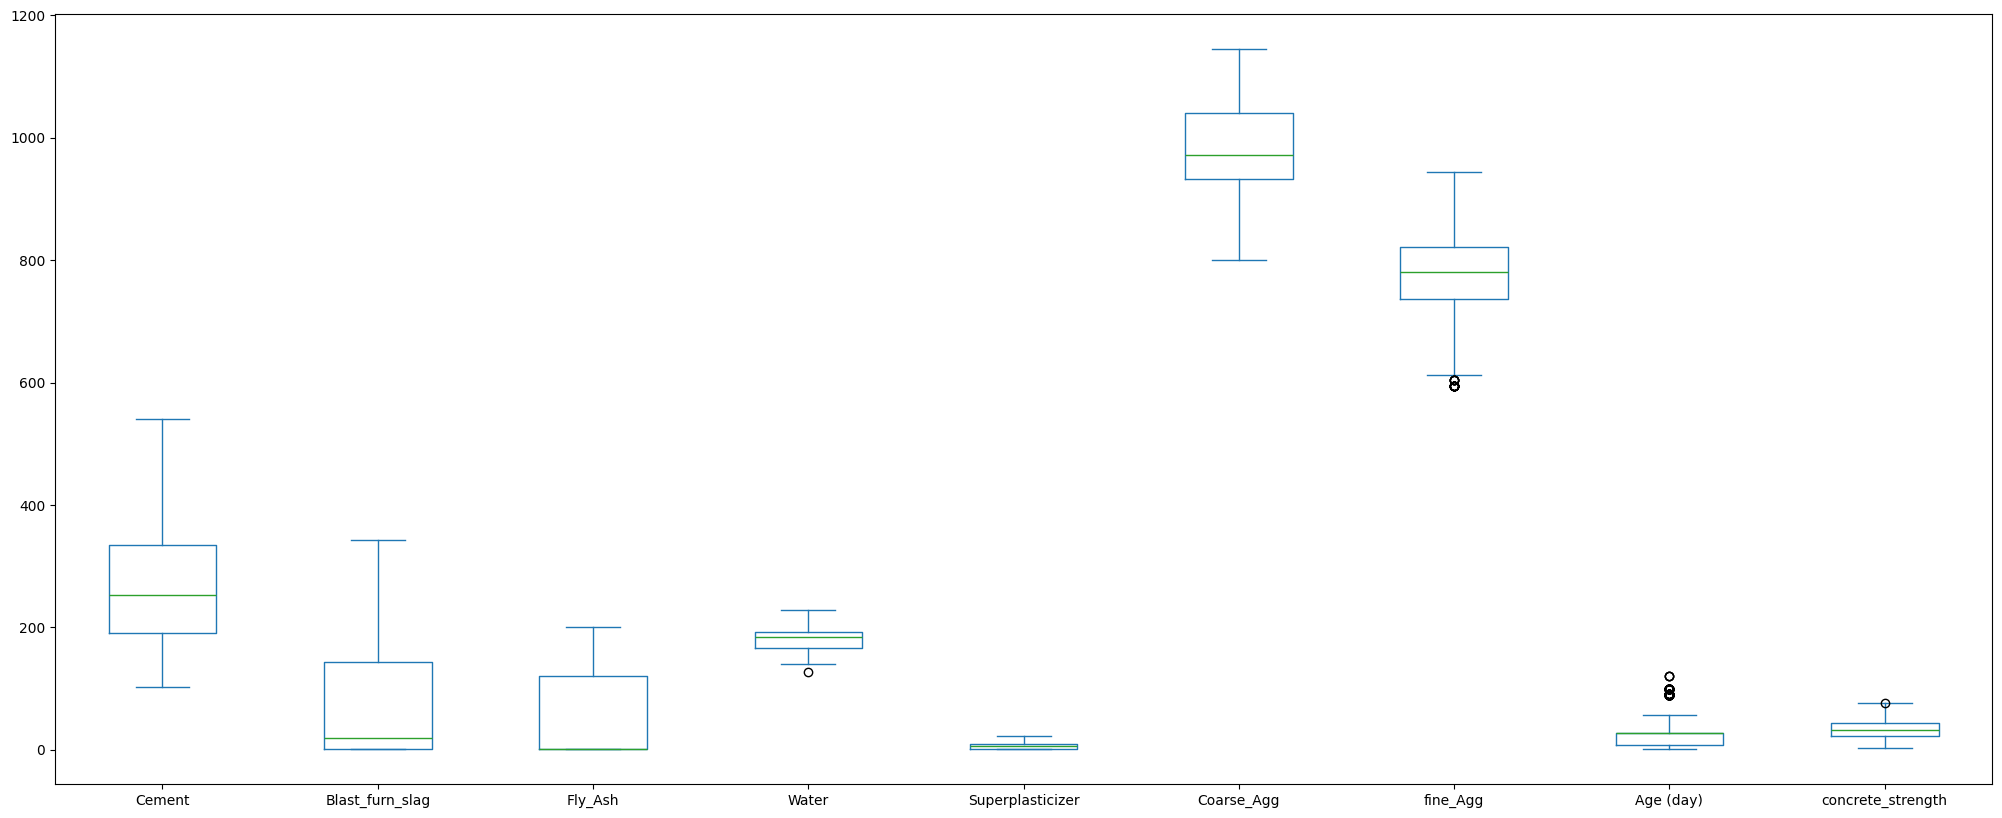

In [22]:
#after outlier removal we get value
#outlier analyzing
df.plot.box(figsize=(25,10))
plt.xticks(rotation='horizontal')
plt.show()

In [23]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
#Spliting dataset into train and test
from sklearn.model_selection import train_test_split

In [26]:
x=df.iloc[:,0:8]
y=df.iloc[:,-1]

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
x_train.shape,x_test.shape,y_test.shape,y_train.shape
# scaling - standardization is more robust to outliers and can create a more representative distribution.

((728, 8), (183, 8), (183,), (728,))

## **Feature Engineering**

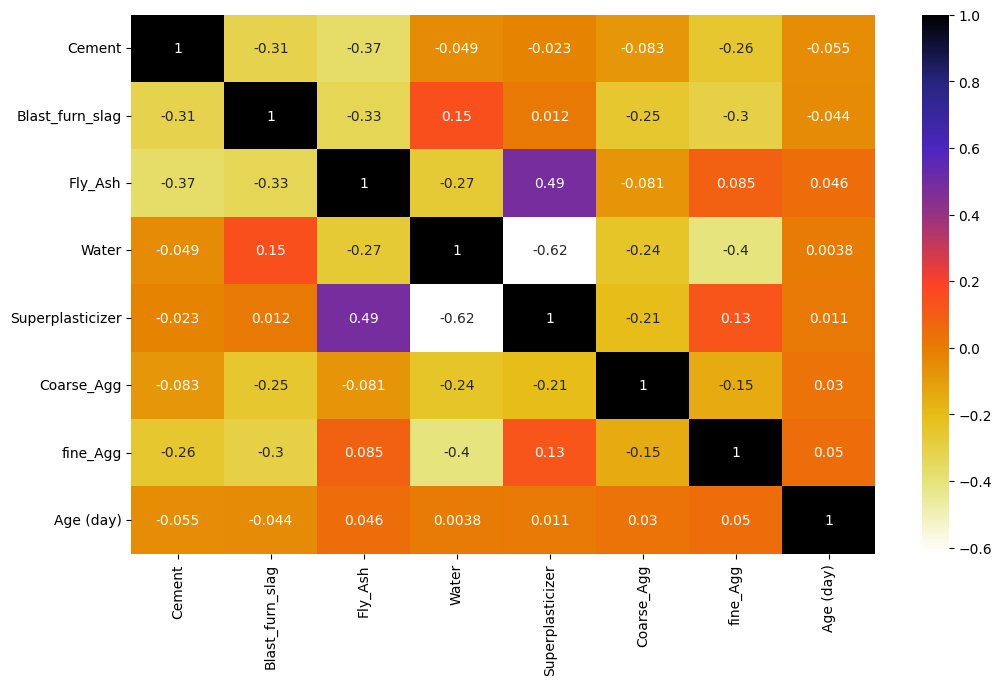

In [29]:
#Using Pearson Correlation
plt.figure(figsize=(12,7))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [30]:
#Feature selection

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [31]:
corr_features = correlation(x_train, 0.5)
len(set(corr_features))

1

According to one analysis, concrete with 30% fly ash and superplasticizer is 34.19% stronger than concrete without fly ash. Superplasticizers can also shorten the hydration induction period of cement-fly ash cementitious material and reduce the exothermic rate of the hydration exothermic peak

In [32]:
corr_features

{'Superplasticizer'}

In [33]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [34]:
#Features Scaling  and all the thing would be run in columns transformer;
from sklearn.preprocessing import MinMaxScaler
mi=MinMaxScaler()

x_train_scale=mi.fit_transform(x_train)
x_test_scale=mi.transform(x_test)

## **Model Selection**

In [35]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error

In [36]:
#these are the linner regression and regularizations algorithms
"""
# Linear Regression
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8160311078493554
47.989600538277365

# Ridge
reg = Ridge(alpha=0.1)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8160311006578206
47.98960241424064

# Lasso
reg = Lasso(alpha=0.01)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8160271000222876
47.990646008616196

# elastic-net
reg1 = ElasticNet(alpha=0.01)
reg1.fit(x_train,y_train)
y_pred = reg1.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8160288428116014
47.990191389566135


from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9261531052885221
19.263490347564375

from sklearn.tree import DecisionTreeRegressor
rft=DecisionTreeRegressor()
rft.fit(x_train,y_train)
y_pred = rft.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.818236122775269
47.414406633272606

from sklearn.ensemble import GradientBoostingRegressor
gr=GradientBoostingRegressor(**params)
gr.fit(x_train,y_train)
y_pred =gr.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9280515992997818
18.768254614177142
"""

'\n# Linear Regression\nreg = LinearRegression()\nreg.fit(x_train,y_train)\ny_pred = reg.predict(x_test)\nprint(r2_score(y_test,y_pred))\nprint(mean_squared_error(y_test,y_pred))\n\n0.8160311078493554\n47.989600538277365\n\n# Ridge\nreg = Ridge(alpha=0.1)\nreg.fit(x_train,y_train)\ny_pred = reg.predict(x_test)\nprint(r2_score(y_test,y_pred))\nprint(mean_squared_error(y_test,y_pred))\n\n0.8160311006578206\n47.98960241424064\n\n# Lasso\nreg = Lasso(alpha=0.01)\nreg.fit(x_train,y_train)\ny_pred = reg.predict(x_test)\nprint(r2_score(y_test,y_pred))\nprint(mean_squared_error(y_test,y_pred))\n\n0.8160271000222876\n47.990646008616196\n\n# elastic-net\nreg1 = ElasticNet(alpha=0.01)\nreg1.fit(x_train,y_train)\ny_pred = reg1.predict(x_test)\nprint(r2_score(y_test,y_pred))\nprint(mean_squared_error(y_test,y_pred))\n\n0.8160288428116014\n47.990191389566135\n\n\nfrom sklearn.ensemble import RandomForestRegressor\nrf=RandomForestRegressor()\nrf.fit(x_train,y_train)\ny_pred = rf.predict(x_test)\nprin

## **HyperParameter Tuning and Model Evaluation**

In [37]:
params = {
    "n_estimators":400,
    "max_depth": 8,
    "min_samples_split": 9,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
reg=GradientBoostingRegressor(**params)
reg.fit(x_train_scale, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test_scale))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 17.6952


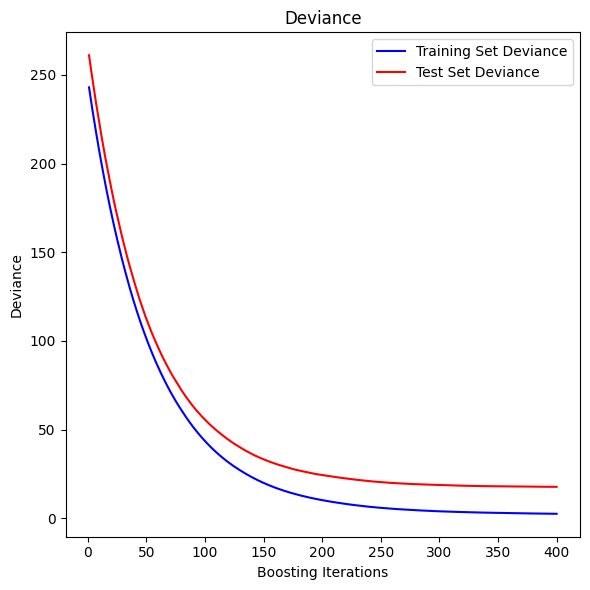

In [39]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_test_scale)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

#### **Choosing XGBoost model**

In [40]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import xgboost as xgb

In [47]:
from sklearn.preprocessing import StandardScaler

Mean Squared Error: 17.283707969183414
R2 Score: 0.9337426323269813


<Figure size 1000x600 with 0 Axes>

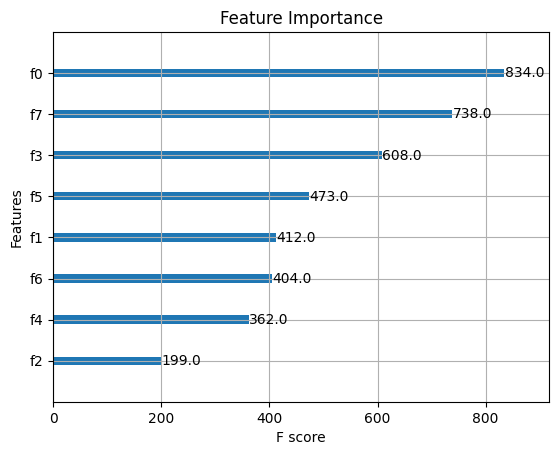

Predicted Concrete Strength: 61.69 MPa


In [48]:
# Prepare features and target
X = df.drop('concrete_strength', axis=1)
y = df['concrete_strength']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train XGBoost model
model = xgb.XGBRegressor(
    n_estimators=100, 
    learning_rate=0.1, 
    random_state=42
)

# Fit the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Feature Importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Function for making predictions
def predict_concrete_strength(input_features):
    # Scale the input features
    input_scaled = scaler.transform(np.array(input_features).reshape(1, -1))
    
    # Predict
    prediction = model.predict(input_scaled)[0]
    
    return prediction

# Example prediction
sample_input = X.iloc[0].values  # Using first row as an example
predicted_strength = predict_concrete_strength(sample_input)
print(f"Predicted Concrete Strength: {predicted_strength:.2f} MPa")


In [49]:
!pip install joblib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import joblib
joblib.dump(model, 'concrete_strength_model.pkl')
joblib.dump(scaler, 'concrete_strength_scaler.pkl')

['concrete_strength_scaler.pkl']